In [1]:
import pandas as pd
import seaborn as sns
import os


In [2]:
B = 'Bridges.xlsx'
Bridge = pd.read_excel(B) 
Bridge.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,3976.0,8.976,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,305.0,12.660,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,333.0,12.688,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,1672.0,17.134,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,2260.0,17.222,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0


In [3]:
#add a column that converts the latitude degree/minutes/seconds to decimals
Bridge['LatitudeDecimal'] = Bridge['LatitudeDegree'] + (Bridge['LatitudeMinute']/60) + (Bridge['LatitudeSecond']/3600)

In [4]:
#add a column that converts the longitude degree/minutes/seconds to decimals
Bridge['LongitudeDecimal'] = Bridge['LongitudeDegree'] + (Bridge['LongitudeMinute']/60) + (Bridge['LongitudeSecond']/3600)
Bridge.head()


,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0,23.702083,90.515917
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0,23.691222,90.544889
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0,23.691111,90.544889
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0,23.659417,90.569694
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0,23.656056,90.574361


In [5]:
# Check if there are any NAN values
print(Bridge.columns)

Index(['Number', 'StructureName', 'StructureType', 'Condition of Bridge',
       'TotalWidth', 'TotalLength', 'ConstructionYear', 'NumberOfSpan', 'Zone',
       'Circle', 'Division', 'Sub-Division', 'RoadNo', 'Unnamed: 13',
       'StructureLRPName', 'ReferenceLRPNo', 'LocationLRPOffset',
       'LocationChainage', 'LatitudeDegree', 'LatitudeMinute',
       'LatitudeSecond', 'LongitudeDegree', 'LongitudeMinute',
       'LongitudeSecond', 'Unnamed: 24', 'BCS1TotalScore', 'LatitudeDecimal',
       'LongitudeDecimal'],
      dtype='object')


In [6]:
# Delete the Unnamed:24 column
Bridge.drop('Unnamed: 24', inplace=True, axis=1, )

In [7]:
# Delete the Unnamed:13 column
Bridge.drop('Unnamed: 13', inplace=True, axis=1, )

In [8]:
# Drop all rows where there is a value missing
Bridge = Bridge.dropna()

<AxesSubplot:xlabel='TotalWidth', ylabel='Count'>

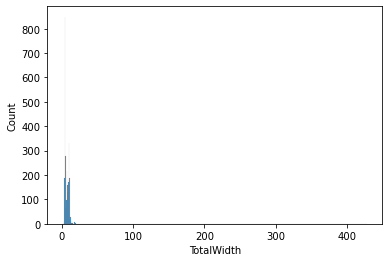

In [9]:
# plot a histogram of the total widths of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalWidth")

In [10]:
# check which bridges are wider than 30 meter
Bridge_width = Bridge.loc[Bridge["TotalWidth"]>30]
Bridge_width

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
56,57.0,Shikalbaha Bridge,PC Girder Bridge,A,31.2,17.30,2010.0,1.0,Chittagong,Chittagong,...,247.637,22.0,18.0,55.2,91.0,51.0,19.1,0.0,22.315333,91.855306
1309,1310.0,Bolloppur Bridge,RCC Girder Bridge,C,428.0,10.25,1997.0,1.0,Comilla,Comilla,...,9.950,23.0,34.0,17.2,90.0,56.0,56.3,31.0,23.571444,90.948972


After checking on google these bridges, only Shikalbaha Bridge is correct, the other one is too large


In [11]:
# Drop the other bridge as it is too large
Bridge.drop(1309,axis=0,inplace=True)

<AxesSubplot:xlabel='TotalLength', ylabel='Count'>

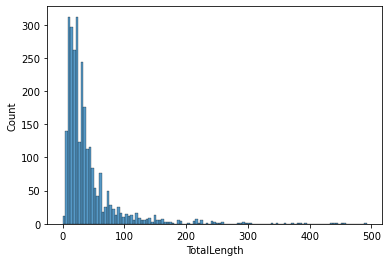

In [22]:
# plot a histogram of the total length of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalLength")

In [13]:
Bridge_lenth = Bridge.loc[Bridge["TotalLength"]>500]
Bridge_lenth

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
16,17.0,Meghna Bridge,PC Girder Bridge,A,9.14,924.85,1989.0,13.0,Dhaka,Dhaka,...,24.393,23.0,36.0,34.30,90.0,36.0,43.80,0.0,23.609528,90.612167
31,32.0,Daudkandi Bridge.,PC Box,A,9.13,1408.80,1995.0,17.0,Dhaka,Dhaka,...,37.010,23.0,31.0,47.50,90.0,41.0,42.50,0.0,23.529861,90.695139
55,56.0,Sha Amanot Bridge,PC Box,A,24.28,954.50,2009.0,11.0,Chittagong,Chittagong,...,246.020,22.0,19.0,44.90,91.0,51.0,6.00,0.0,22.329139,91.851667
227,228.0,Bhairab Bridge,PC Box,A,19.75,924.00,2002.0,9.0,Mymensingh,Mymensingh,...,71.834,24.0,2.0,55.84,90.0,59.0,30.15,0.0,24.048844,90.991708
439,440.0,Dhaleshwari Bridge,RCC Girder Bridge,A,7.90,506.59,1964.0,11.0,Dhaka,Dhaka,...,48.000,23.0,52.0,51.60,90.0,1.0,42.90,0.0,23.881000,90.028583
445,446.0,Tora Bridge,PC Girder Bridge,B,9.30,645.66,1974.0,11.0,Dhaka,Dhaka,...,55.866,23.0,51.0,41.50,89.0,57.0,39.00,1.0,23.861528,89.960833
465,466.0,Baral Bridge,PC Girder Bridge,C,10.08,573.47,1980.0,15.0,Rajshahi,Pabna,...,129.616,24.0,8.0,4.00,89.0,35.0,5.00,30.0,24.134444,89.584722
581,582.0,Garai Bridge,Truss with RCC Slab,B,8.70,612.50,1991.0,7.0,Khulna,Jessore,...,65.221,23.0,32.0,40.00,89.0,31.0,6.00,1.0,23.544444,89.518333
609,610.0,Postagola Bridge,PC Girder Bridge,A,17.60,847.90,1989.0,21.0,Dhaka,Dhaka,...,2.587,23.0,41.0,21.70,90.0,25.0,45.90,0.0,23.689361,90.429417
1115,1116.0,Mir Mosharraf Hosain Bridge,Truss with RCC Slab,C,10.00,504.54,2009.0,9.0,Khulna,Jessore,...,65.214,23.0,53.0,7.00,89.0,10.0,58.00,501.0,23.885278,89.182778


In [14]:
# Drop the bridges that are longer than 500 meters
Bridge_lenthindex = list(Bridge_lenth.index)
Bridge.drop(Bridge_lenthindex,axis=0,inplace=True)

In [15]:
Bridgelatitudewrong = Bridge.loc[Bridge["LatitudeDecimal"]>27]
Bridgelatitudewrong

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
2494,2495.0,Naodanga Pooler Par Bridge,RCC Girder Bridge,B,4.6,23.53,1988.0,3.0,Rangpur,Rangpur,...,18.41,89.0,33.0,49.6,25.0,56.0,49.6,30.0,89.563778,25.947111


In [16]:
# Drop the bridge that has swapped the value for longitude and latitude
Bridgelatitudewrongindex = list(Bridgelatitudewrong.index)
Bridge.drop(Bridgelatitudewrongindex,axis=0,inplace=True)

There is no strange outliers identiefied for the length of the bridges.

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal


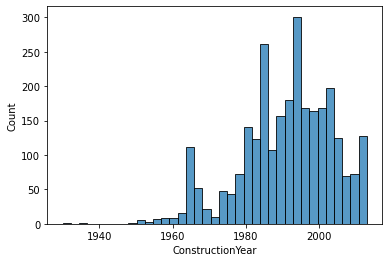

In [23]:
# plot a histogram of the construction year of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x = 'ConstructionYear')
ConstructionYear = Bridge.loc[Bridge["ConstructionYear"]>2021]
ConstructionYear

In [18]:
# Drop the bridge that has the wrong construction date
ConstructionYearindex = list(ConstructionYear.index)
Bridge.drop(ConstructionYearindex,axis=0,inplace=True)

This bridge is from 2080, need to be recoded to 1980 or deleted. 

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
346,347.0,Keen Bridge,Steel Beam & RCC Slab,C,5.80,358.00,1936.0,22.0,Sylhet,Sylhet,...,58.496,24.0,53.0,10.3,91.0,52.0,5.2,560.0,24.886194,91.868111
2208,2209.0,Atrai Bridge.,RCC Girder Bridge,A,7.87,492.58,2006.0,24.0,Rangpur,Dinajpur,...,10.730,25.0,55.0,50.4,88.0,43.0,14.7,0.0,25.930667,88.720750


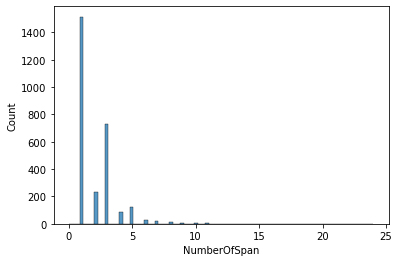

In [24]:
sns.histplot(data = Bridge, x = 'NumberOfSpan')
NumberOfSpan = Bridge.loc[Bridge["NumberOfSpan"]>20]
NumberOfSpan

In [20]:
# Drop the bridge that has too many spans
#NumberOfSpanindex = list(NumberOfSpan.index)
#Bridge.drop(NumberOfSpanindex,axis=0,inplace=True)

All these bridges were checked with google and are correct. 

All bridges with a length superior to 500m are actualy existing and that large. 

### Compare geospatially

In [21]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
land = gpd.read_file("../data/raw/BGD_adm0.shp")

In [ ]:
type(land)

In [ ]:
#land["geometry"] = land
land.plot()
type(land)

In [ ]:
landg = land["geometry"]
type(landg)

In [ ]:
lands = landg.simplify(100)
lands.plot()

In [ ]:
bridge_geo = gpd.GeoDataFrame(Bridge, geometry=gpd.points_from_xy(Bridge["LongitudeDecimal"], Bridge["LatitudeDecimal"]))
bridge_geo.plot()

In [ ]:
bridge_geo = bridge_geo.buffer(500)
bridge_geo = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bridge_geo))
type(bridge_geo)

In [ ]:
real_bridges = gpd.overlay(land, bridge_geo, how="intersection")
real_bridges.plot()

### Other boundingbox stuff

In [ ]:
sea_bridge = Bridge.loc[Bridge["LatitudeDecimal"] < 21.834]
sea_bridge1 = sea_bridge.loc[sea_bridge["LongitudeDecimal"] > 90.121]
sea_bridge2 = sea_bridge1.loc[sea_bridge1["LongitudeDecimal"] < 91.85]
sea_bridge2.head()

In [ ]:
sea_bridge3 = Bridge.loc[Bridge["LatitudeDegree"] < 20.794]
sea_bridge3.head()

In [ ]:
sea_bridge4 = Bridge.loc[Bridge["LatitudeDegree"] < 21.45]
sea_bridge5 = sea_bridge4.loc[sea_bridge4["LongitudeDegree"] < 91.89]
sea_bridge5.head()

In [ ]:
sea_bridge6 = Bridge.loc[Bridge["LatitudeDegree"] < 22.05]
sea_bridge7 = sea_bridge6.loc[sea_bridge6["LongitudeDegree"] > 90]
sea_bridge8 = sea_bridge7.loc[sea_bridge7["LongitudeDegree"] < 91.64]
sea_bridge8.head()

In [ ]:
sea_bridges_final = Bridge.subtract(sea_bridge2, axis= 0)
sea_bridges_final

In [ ]:
new = df1.merge(df2,on=['Team','Year'],how='left')
sea_bridge5.rows - sea_bridge3.rows - sea_bridge2.rows
